In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
fatal_police_shooting_us = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PoliceKillingsUS.csv', encoding="windows-1252")
demographic = pd.read_csv('/content/drive/My Drive/data/cleaned-data/demographic.csv', encoding="windows-1252")

# **Demographics**

In [5]:
demographic.describe()

,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29132.000000,29125.000000,27383.000000,28930.000000,28930.000000,28930.000000,28930.000000,28930.000000
mean,85.733805,16.444045,51177.670672,83.190149,6.882655,2.856685,1.547159,9.203426
std,11.875153,13.176623,24887.873873,21.649996,15.673815,12.627056,4.293338,17.269697
min,0.000000,0.000000,4511.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.000000,7.100000,35625.000000,78.500000,0.100000,0.100000,0.000000,1.200000
50%,88.400000,13.700000,45305.000000,92.500000,0.800000,0.300000,0.400000,2.900000
75%,93.500000,22.500000,59482.000000,96.900000,4.300000,0.900000,1.200000,8.000000
max,100.000000,100.000000,244083.000000,100.000000,100.000000,100.000000,67.100000,100.000000




*   85.7% of people over 25 completed high school
*   Average median income is 51177
*   16.4% of people are in poverty


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Average share per race in US')

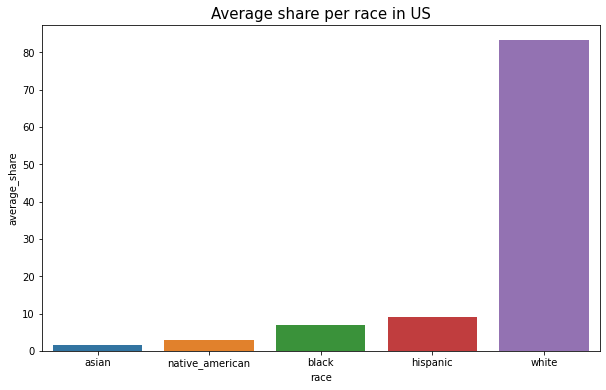

In [6]:
average_share_per_race = pd.DataFrame({'race':['white','black','native_american','asian','hispanic'],
                                       'average_share':[83.190149,6.882655,2.856685	,1.547159,9.203426]})
average_share_per_race = average_share_per_race.sort_values(by='average_share')
plt.figure(figsize=(10,6))
plt.title('Average share per race in US', fontdict={'fontsize':15})
sns.barplot(x=average_share_per_race['race'], y=average_share_per_race['average_share'])

Text(0.5, 1.0, 'Median Income')

Text(0.5, 1.0, 'Poverty Rate')

Text(0.5, 1.0, 'Percent Completed High School')

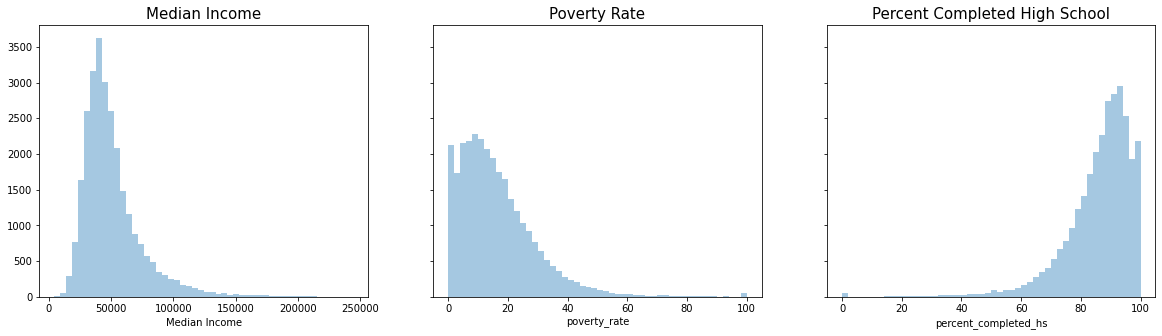

In [7]:
fig, ax = plt.subplots(1,3,figsize=(20,5), sharey=True)

#ax[0].ticklabel_format(style='plain')
sns.distplot(demographic['Median Income'], ax=ax[0], kde=False)
ax[0].set_title('Median Income', fontdict={'fontsize': 15})

sns.distplot(demographic['poverty_rate'], ax=ax[1], kde=False)
ax[1].set_title('Poverty Rate', fontdict={'fontsize': 15})

sns.distplot(demographic['percent_completed_hs'], ax=ax[2], kde=False)
ax[2].set_title('Percent Completed High School', fontdict={'fontsize': 15})

Text(0.5, 1.0, 'Correlations between each demographic')

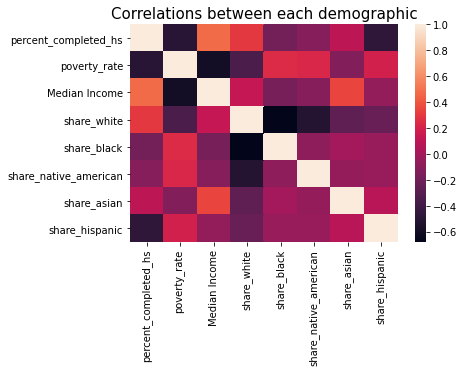

In [ ]:
plt.title('Correlations between each demographic',fontdict={'fontsize':15})
sns.heatmap(demographic.corr())

Text(0.5, 1.0, 'Poverty rate and Median Income')

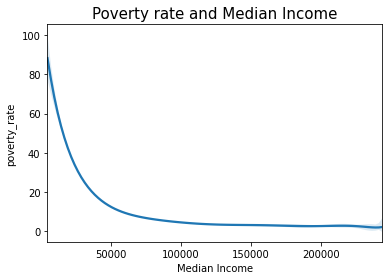

In [8]:
plt.title('Poverty rate and Median Income', fontdict={'fontsize':15})
sns.regplot(x = demographic['Median Income'], y = demographic['poverty_rate'], order=10, scatter=False)

In [9]:
demographic[demographic['Median Income'] == demographic['Median Income'].max()]

,state,city,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
3505,CO,Crisman,100.0,0.0,244083.0,97.8,0.0,0.5,1.1,4.3


# **Fatal Police Shooting US**

In [10]:
fatal_police_shooting_us['date'] = pd.to_datetime(fatal_police_shooting_us['date'], format='%d/%m/%y')

In [ ]:
fatal_police_shooting_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   float64       
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

In [ ]:
police_killing_us['date'].sort_values()

947     01/01/16
1820    01/01/17
1825    01/01/17
1824    01/01/17
1823    01/01/17
          ...   
1698    31/10/16
946     31/12/15
1819    31/12/16
1817    31/12/16
1818    31/12/16
Name: date, Length: 2254, dtype: object

The data was collected from 2015-01-02 till 2017-07-31

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Age of the victims')

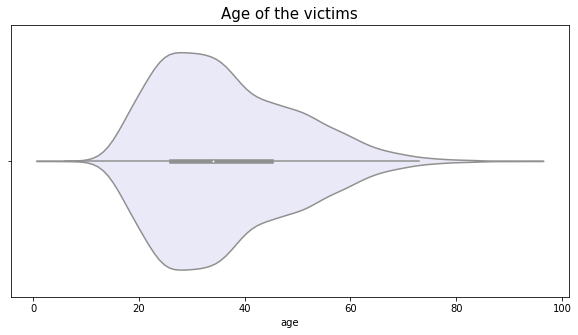

In [13]:
plt.figure(figsize=(10,5))
plt.title('Age of the victims', fontdict={'fontsize':15})
sns.violinplot(x=police_killing_us['age'],color='lavender')

Text(0.5, 1.1, 'Age distribution of the victims by fleeing method')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


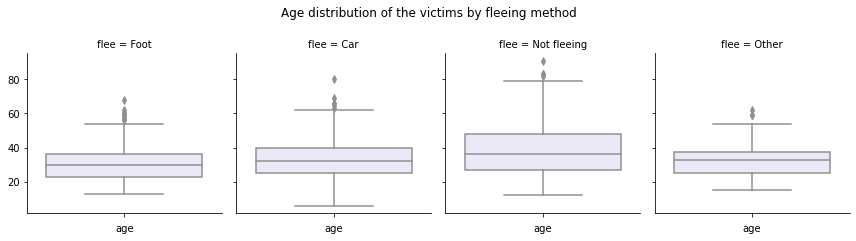

In [32]:
grid = sns.FacetGrid(police_killing_us,col='flee',col_order=['Foot','Car','Not fleeing','Other'])
plt.suptitle('Age distribution of the victims by fleeing method', y=1.1)
grid.map(sns.boxplot, 'age', orient='vertical', color='lavender')

Text(0.5, 1.0, 'Average age for each gender and race')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,20,Jessie Hernandez,2015-01-26,shot,vehicle,17.0,F,H,Denver,CO,False,other,Not fleeing,False
147,189,Jessica Uribe,2015-02-28,shot,knife,28.0,F,H,Tucson,AZ,False,other,Not fleeing,False
717,871,Norma Angelica Guzman,2015-09-27,shot,knife,37.0,F,H,Los Angeles,CA,True,other,Not fleeing,True
1433,1695,Melissa Ventura,2016-07-05,shot,knife,24.0,F,H,Yuma,AZ,False,other,Not fleeing,False


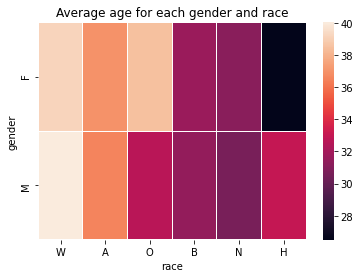

In [ ]:
a=pd.pivot_table(data=fatal_police_shooting_us, values='age', index='gender', columns='race')
a=a.reindex(columns=['W','A','O','B','N','H'])
plt.title('Average age for each gender and race')
sns.heatmap(a, mask=a.isnull(), linewidth=0.01, linecolor='white')
fatal_police_shooting_us[(fatal_police_shooting_us['gender']=='F') & (fatal_police_shooting_us['race']=='H')]

White vitims in average are the oldest, whereas Native American and Hispanic are the youngest.
For all races except White and Hispanic, Male vitims on average are younger.
Female Hispanic are noticably younger than the others. So I tried to select cases in which Female Hispanic were victimes. As a result, there was only 4 cases. Therefore, the data doesn't contain a good representation for female hispanic.


!Note:

*   W: White - Not Hispanic
*   B: Black - Not Hispanic
*   A: Asian
*   H: Hispanic
*   N: Native American
*   O: Other




<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Total number of people killed')

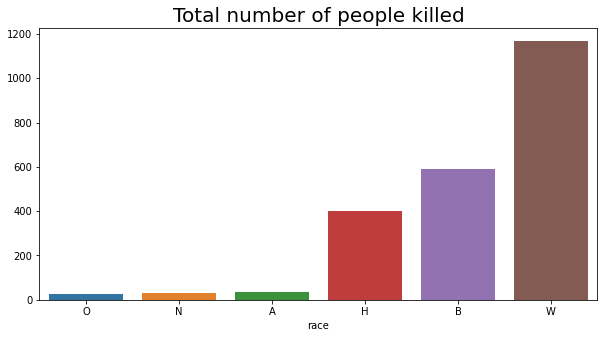

In [ ]:
a=fatal_police_shooting_us.groupby('race').size().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=a.index, y=a)
plt.title('Total number of people killed',fontdict={'fontsize':20})

In this chart, we can see that most of the victims were White. However, since the total population of each race in the US is different, especially for White taking a large portion of the US population, a bar plot with the percent people being killed by race would be a better visualization.

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Percent of people per race killed')

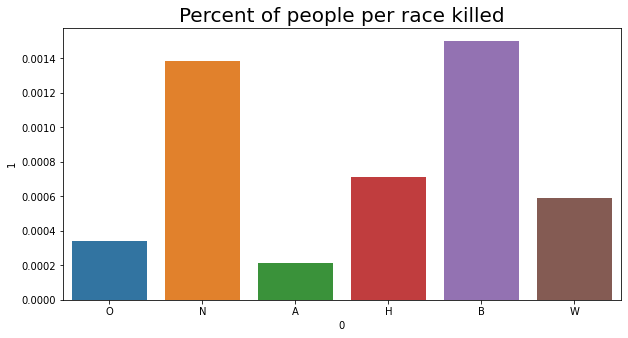

In [ ]:
a = police_killing_us.groupby('race').size().sort_values()
percent_death_per_race = list()
# these are the population for each race in 2017 collected from https://en.wikipedia.org/wiki/Demographics_of_the_United_States
total_population_per_race = {
    'White':197277789,
    'NativeAmerican':2098763,
    'Asian':16989540,
    'Hispanic':56510571,
    'Black':39445495,
    'Others':8166727
}

for race, total_death in a.iteritems():
  if race == 'W':
    death_per_race = total_death/total_population_per_race['White']*100
  elif race == 'N':
    death_per_race = total_death/total_population_per_race['NativeAmerican']*100
  elif race == 'A':
    death_per_race = total_death/total_population_per_race['Asian']*100
  elif race == 'H':
    death_per_race = total_death/total_population_per_race['Hispanic']*100
  elif race == 'B':
    death_per_race = total_death/total_population_per_race['Black']*100
  else:
    death_per_race = total_death/total_population_per_race['Others']*100
  percent_death_per_race.append((race, death_per_race))
percent_death_per_race = pd.DataFrame(percent_death_per_race)
plt.figure(figsize=(10,5))
sns.barplot(x=percent_death_per_race[0], y=percent_death_per_race[1])
plt.title('Percent of people per race killed',fontdict={'fontsize':20})

This chart shows that Black and Native American are much more likely to be shot. The proportion and Black being shot is almost three times higher than White.
However, this chart still have a caveat: total death per race divided by the total population per race may not be a good representation for the racial bias. What if Black and Native American have higher proportion of being shot was because they caused more criminals? 

Since most of these cases happened when the victims were suspected or alledged to be criminal, taking total death divided by the total population doesn't illustrate the racial bias of the police toward the criminals. Instead, the denominator should be some value that represent the crimes of that race.

Assuming that all of the police making these fatal shots were all properly trained, we can say that these victims were making some act of crimes during the incident.
In this case, I set the denominator to be total arrest cases for each city in the US. Although death divided arrest doesn't give us any concrete value (people cannot be both shot and arrested), total arrest cases are a good representation of crimes in an area and therefore, the fraction would give us a better estimate about fatal shooting cases and criminals in each city.

' These data represent the total arrest in 2015, 2016, 2017: \n  https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-43\n  https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-21\n  https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/tables/table-43\n'

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Percent of criminals per race killed')

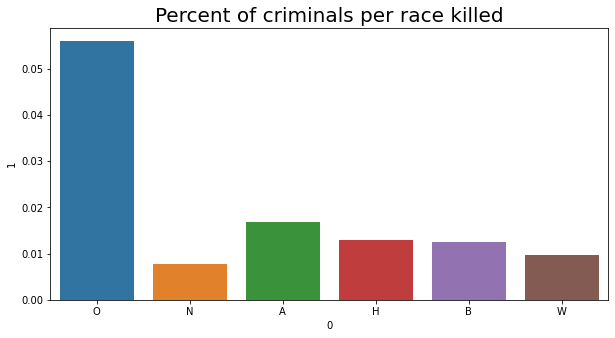

In [ ]:
''' These data represent the total arrest in 2015, 2016, 2017: 
  https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-43
  https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-21
  https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/tables/table-43
'''
a = fatal_police_shooting_us.groupby('race').size().sort_values()
percent_death_per_race_criminal = list()

total_criminal_cases={
    'White': 5753212*0.816 + 5858330*0.816 + 7/12*0.819*5626140,
    'Black': 2197140*0.816 + 2263112*0.816 + 7/12*0.819*2221697, 
    'Asian': 101064*0.816 + 103244*0.816 + 7/12*0.819*97049,
    'NativeAmerican': 174020*0.816 + 171185*0.816 + 7/12*0.819*196908,
    'Hispanic': 1204862 + 1221066 + 7/12*1190671,
    'Others': 23273*0.816 + 25610*0.816 + 7/12*0.819*21055
}

for race, total_death in a.iteritems():
  if race == 'W':
    death_per_race_criminal = total_death/total_criminal_cases['White']*100
  elif race == 'N':
    death_per_race_criminal = total_death/total_criminal_cases['NativeAmerican']*100
  elif race == 'A':
    death_per_race_criminal = total_death/total_criminal_cases['Asian']*100
  elif race == 'H':
    death_per_race_criminal = total_death/total_criminal_cases['Hispanic']*100
  elif race == 'B':
    death_per_race_criminal = total_death/total_criminal_cases['Black']*100
  else:
    death_per_race_criminal = total_death/total_criminal_cases['Others']*100
  percent_death_per_race_criminal.append((race, death_per_race_criminal))

percent_death_per_race_criminal = pd.DataFrame(percent_death_per_race_criminal)
plt.figure(figsize=(10,5))
sns.barplot(x=percent_death_per_race_criminal[0], y=percent_death_per_race_criminal[1])
plt.title('Percent of criminals per race killed',fontdict={'fontsize':20})


Calculating steps:
* Since the datasets provided from FBI:UCR don't have categories for non-Hispanic of each of the other races, I calculated that by multiplying total cases of each race by the percentage of non-Hispanic cases, assuming that each of the other races shares the same proportion of Hispanic/non-Hispanic.
* Note that the FatalPoliceShootingUS only have records from Jan 2015 to July 2017. However, the datasets from FBI:UCR have the total cases for each year 2015, 2016, and 2017. Therefore, we have to add the total of each of the year to find the total cases during the period. Besides, for 2017, assuming number of cases are not affected by the time of a year, I multiply the total cases in 2017 by 7/12 to get the estimate of total cases in the first 7 months of 2017.

Results:
* The percentage of criminals being shot for the Others race is disproportionally high.
* Among the other races, although there are differences between the proportion of each race being killed, the bias is not significant.

date
2015-01-02    2
2015-01-03    1
2015-01-04    3
2015-01-05    1
2015-01-06    4
             ..
2017-07-24    1
2017-07-25    3
2017-07-26    1
2017-07-27    1
2017-07-31    2
Length: 846, dtype: int64

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Total death each day from 2015-01 till 2017-09')

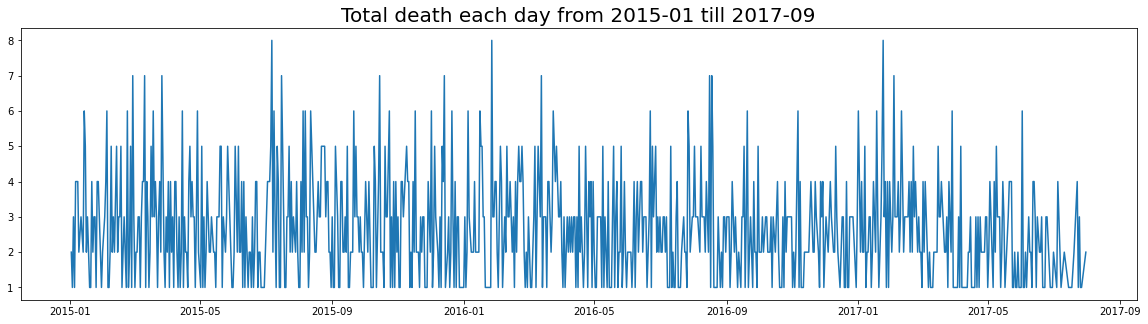

In [ ]:
a = fatal_police_shooting_us.groupby('date').size()
a
plt.figure(figsize=(20,5))
plt.title('Total death each day from 2015-01 till 2017-09',fontdict={'fontsize':20})
sns.lineplot(data=a)

Text(0.5, 1.0, 'Total victims each month from January 2015 to July 2017')

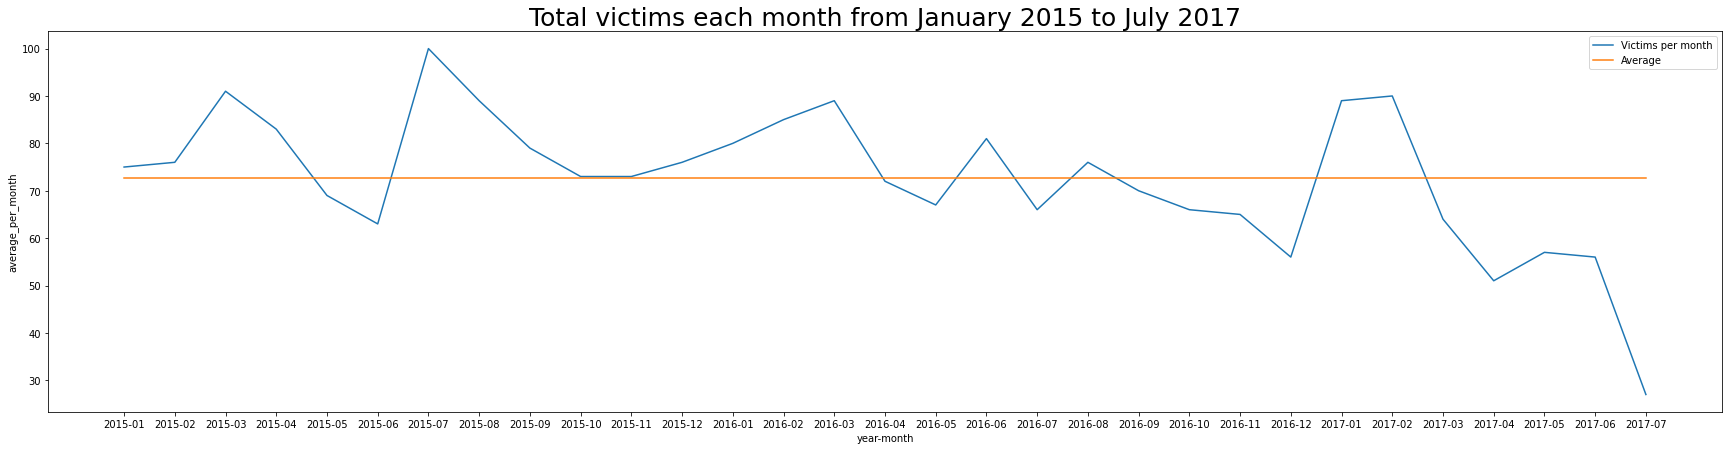

In [ ]:
fatal_police_shooting_us['month'] = fatal_police_shooting_us['date'].dt.month#.value_counts()
fatal_police_shooting_us['month'] = fatal_police_shooting_us['month'].astype('str')
fatal_police_shooting_us['month'] = fatal_police_shooting_us['month'].map(lambda x: '0'+ x if len(x)==1 else x)

fatal_police_shooting_us['year'] = fatal_police_shooting_us['date'].dt.year

fatal_police_shooting_us['year-month'] = fatal_police_shooting_us['year'].astype('str') + '-' + fatal_police_shooting_us['month'].astype('str')
shooting_per_month = fatal_police_shooting_us.groupby('year-month').size()

fig, ax = plt.subplots(figsize=(30,7))
ax.set_title('Total victims each month from January 2015 to July 2017', fontdict={'fontsize':25})
sns.lineplot(ax=ax, x=shooting_per_month.index, y=shooting_per_month)

###########
shooting_per_month = pd.DataFrame(shooting_per_month)
shooting_per_month['average_per_month'] = shooting_per_month[0].mean()

sns.lineplot(ax=ax, x=shooting_per_month.index, y=shooting_per_month['average_per_month'])
ax.legend(labels=['Victims per month','Average'])

Time and total death are not correlated.

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Total fatal shots in each state')

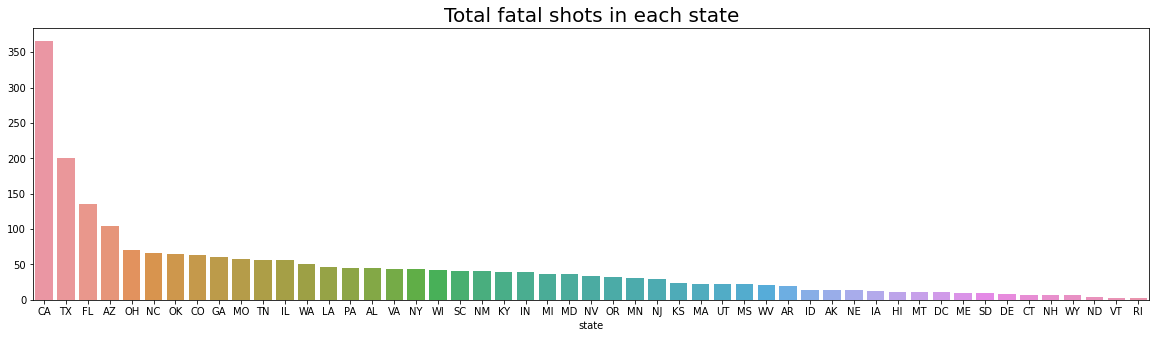

In [ ]:
##### need to divide by each state's polulation
a = police_killing_us.groupby('state').size().sort_values(ascending=False)
plt.figure(figsize=(20,5))
plt.title('Total fatal shots in each state', fontdict={'fontsize':20})
sns.barplot(x = a.index, y = a)

CA, TX, FL and have most police killing cases


Same as cases per race, for this cases per city, we also need to divide the number by total arrest cases per city.


https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-69

https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-22

https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/topic-pages/tables/table-69

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Fatal shot per arrest in each state')

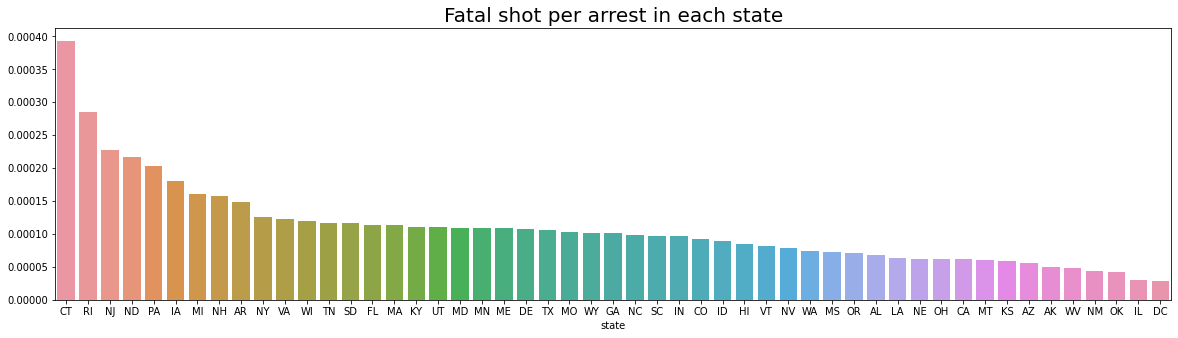

In [ ]:
arrest_by_state = pd.read_csv('/content/drive/My Drive/data/arrest_by_state.csv')

arrest_by_state['2015'] = arrest_by_state['2015'].str.replace(',','')
arrest_by_state['2,016'] = arrest_by_state['2,016'].str.replace(',','')
arrest_by_state['2,017'] = arrest_by_state['2,017'].str.replace(',','')
arrest_by_state['2015'] = arrest_by_state['2015'].astype('int64')
arrest_by_state['2,016'] = arrest_by_state['2,016'].astype('int64')
arrest_by_state['2,017'] = arrest_by_state['2,017'].astype('int64')

arrestfrom2015to2017 = arrest_by_state['2015'] + arrest_by_state['2,016'] + arrest_by_state['2,017']*7/12
arrestfrom2015to2017.index = arrest_by_state['Unnamed: 0'].str.strip()

#https://gist.github.com/rogerallen/1583593

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York6': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

us_state_abbrev = { state.upper(): ab for state, ab in us_state_abbrev.items()}
arrestfrom2015to2017.index = arrestfrom2015to2017.index.map(us_state_abbrev)
death_per_arrest = police_killing_us.groupby('state').size().sort_index() / arrestfrom2015to2017.sort_index()
plt.figure(figsize=(20,5))
plt.title('Fatal shot per arrest in each state', fontdict={'fontsize':20})
sns.barplot(x = death_per_arrest.sort_values().index, y = death_per_arrest.sort_values(ascending=False))

Text(0.5, 1.0, 'Victims with sign of mental illness')

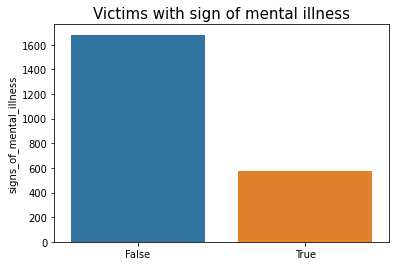

In [ ]:
a = fatal_police_shooting_us['signs_of_mental_illness'].value_counts()
plt.title('Victims with sign of mental illness',fontdict={'fontsize':15})
sns.barplot(x= a.index, y = a)

Text(0.5, 1.0, 'Officers wearing body camera during the incidents')

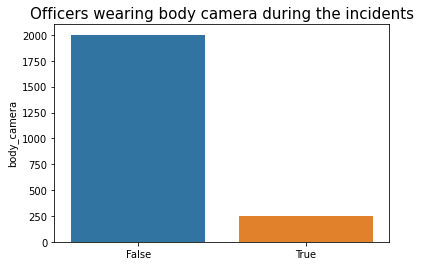

In [ ]:
a = fatal_police_shooting_us['body_camera'].value_counts()
plt.title('Officers wearing body camera during the incidents',fontdict={'fontsize':15})
sns.barplot(x= a.index, y = a)

<Figure size 720x360 with 0 Axes>

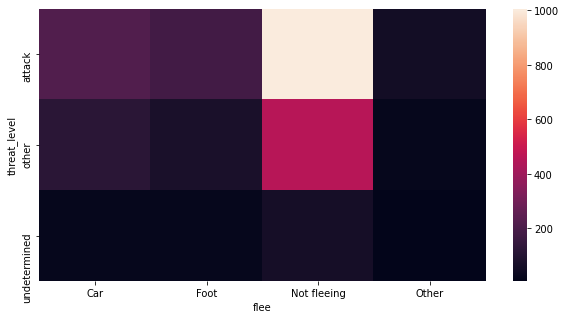

In [ ]:
a = fatal_police_shooting_us.groupby(['threat_level','flee']).size()
a = a.reset_index().pivot(index='threat_level',columns='flee',values = 0)
plt.figure(figsize=(10,5))
sns.heatmap(a)

Text(0.5, 1.0, "Victims' status immediately before the fatal shots")

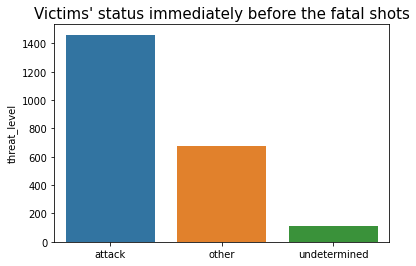

In [ ]:
a = fatal_police_shooting_us['threat_level'].value_counts()
plt.title('Victims\' status immediately before the fatal shots',fontdict={'fontsize':15})
sns.barplot(x= a.index, y = a)

Number of unique weapons armed by the victims: 67


<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Top 10 weapons armed by the victims count')

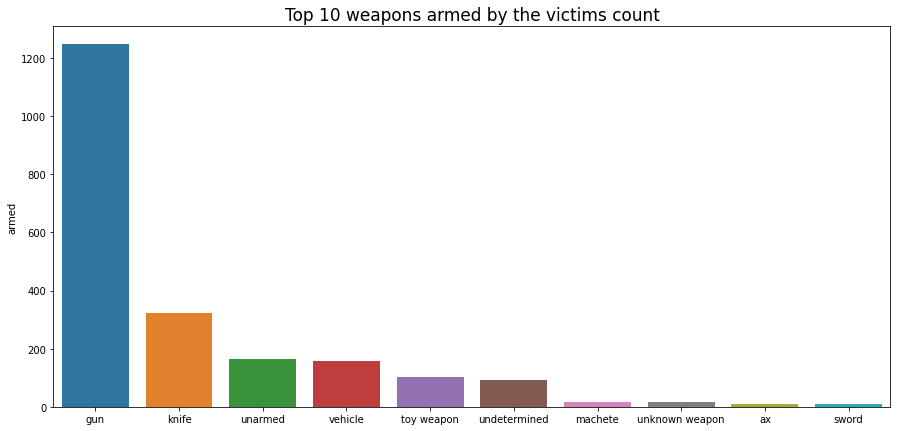

In [ ]:
print('Number of unique weapons armed by the victims: {}'.format(len(fatal_police_shooting_us['armed'].unique())))

count_per_weapon = fatal_police_shooting_us['armed'].value_counts()
plt.figure(figsize=(15,7))
plt.title('Top 10 weapons armed by the victims count',fontdict={'fontsize':17})
sns.barplot(x=count_per_weapon[:10].index, y=count_per_weapon[:10])

Text(0.5, 1.0, 'Manner of death')

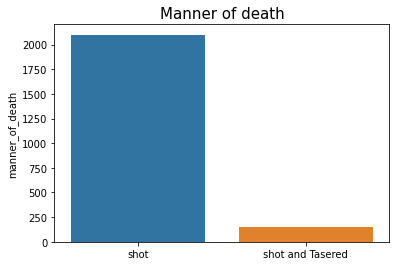

In [ ]:
manner_of_death = fatal_police_shooting_us['manner_of_death'].value_counts()
fig, ax = plt.subplots()
ax.set_title('Manner of death', fontdict={'fontsize': 15})
sns.barplot(ax=ax, x = manner_of_death.index, y = manner_of_death)

Text(0.5, 1.0, 'Flee')

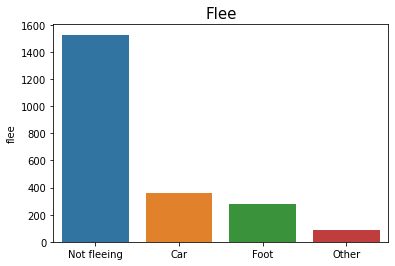

In [ ]:
flee = fatal_police_shooting_us['flee'].value_counts()
fig, ax = plt.subplots()
ax.set_title('Flee', fontdict={'fontsize': 15})
sns.barplot(ax=ax, x = flee.index, y = flee)